In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy

%matplotlib inline
%load_ext autoreload
%autoreload 2


In [34]:
train_data = h5py.File('datasets/train_catvnoncat.h5',"r")
X_train_orig = np.array(train_data["train_set_x"][:])
y_train_orig = np.array(train_data["train_set_y"][:])

test_data = h5py.File('datasets/test_catvnoncat.h5',"r")
X_test_orig = np.array(test_data["test_set_x"][:])
y_test_orig = np.array(test_data["test_set_y"][:])

classes = np.array(test_data['list_classes'][:])


In [15]:
y_train_orig = y_train_orig.reshape((1,y_train_orig.shape[0]))
y_test_orig = y_test_orig.reshape((1,y_test_orig.shape[0]))

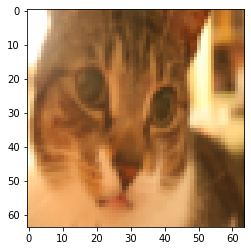

In [20]:
plt.imshow(X_train_orig[200])

## Pre-process the dataset

#### Dimensions and the shapes of the problem

In [28]:

print("dimensions of the original data from dataset \nX:", X_train_orig.shape,",\ny:",y_test_orig.shape )

m_train = X_train_orig.shape[0]
m_test = X_test_orig.shape[0]
num_px = X_train_orig.shape[2]

print("Number of training examples: ",m_train)
print("Number of testing examples: ",m_test)
print("height of each image: ",num_px)
print("size of each image: (%d, %d ,3)" %( num_px,num_px))


dimensions of the original data from dataset 
X: (209, 64, 64, 3) ,
y: (1, 50)
Number of training examples:  209
Number of testing examples:  50
height of each image:  64
size of each image: (64, 64 ,3)


#### Reshape the datasets such that each example is of size(num_px * num_px * 3,1)

In [41]:
train_set_x_flatten = X_train_orig.reshape(X_train_orig.shape[0],-1).T
test_set_x_flatten = X_test_orig.reshape(X_test_orig.shape[0],-1).T

print("verify the size of the training set: %d" %( num_px * num_px * 3))
print('train_set_x_flatten is the size of: ',train_set_x_flatten.shape)
print("Indicating there are %d training data vectors with the size of (%d,1)" %(train_set_x_flatten.shape[1], train_set_x_flatten.shape[0]))

verify the size of the training set: 12288
train_set_x_flatten is the size of:  (12288, 209)
Indicating there are 209 training data vectors with the size of (12288,1)


#### Standarize the dataset by dividing each row of data by 255

In [43]:
train_set_x = train_set_x_flatten/255
test_set_x = test_set_x_flatten/255

In [52]:
train_set_x, test_set_x

(array([[0.06666667, 0.76862745, 0.32156863, ..., 0.56078431, 0.08627451,
         0.03137255],
        [0.12156863, 0.75294118, 0.27843137, ..., 0.60784314, 0.09411765,
         0.10980392],
        [0.21960784, 0.74509804, 0.26666667, ..., 0.64705882, 0.09019608,
         0.20784314],
        ...,
        [0.        , 0.32156863, 0.54117647, ..., 0.33333333, 0.01568627,
         0.        ],
        [0.        , 0.31372549, 0.55294118, ..., 0.41960784, 0.01960784,
         0.        ],
        [0.        , 0.31764706, 0.55686275, ..., 0.58431373, 0.        ,
         0.        ]]),
 array([[0.61960784, 0.45098039, 1.        , ..., 0.16078431, 0.07058824,
         0.52156863],
        [0.40784314, 0.43137255, 0.99215686, ..., 0.18431373, 0.07058824,
         0.63921569],
        [0.3254902 , 0.43529412, 0.99607843, ..., 0.32941176, 0.0627451 ,
         0.29411765],
        ...,
        [0.67843137, 0.67058824, 0.52156863, ..., 0.71764706, 0.56470588,
         0.01960784],
        [0.5

## General Architecture of the Learning Algorithm

<a name='3'></a>
<img src="images/LogReg_kiank.png" style="width:650px;height:400px;">

**Mathematical expression of the algorithm**:

For one example $x^{(i)}$:
$$z^{(i)} = w^T x^{(i)} + b \tag{1}$$
$$\hat{y}^{(i)} = a^{(i)} = sigmoid(z^{(i)})\tag{2}$$ 
$$ \mathcal{L}(a^{(i)}, y^{(i)}) =  - y^{(i)}  \log(a^{(i)}) - (1-y^{(i)} )  \log(1-a^{(i)})\tag{3}$$

The cost is then computed by summing over all training examples:
$$ J = \frac{1}{m} \sum_{i=1}^m \mathcal{L}(a^{(i)}, y^{(i)})\tag{6}$$


#### Step 1 of Building NN: Define Model Structure

In [54]:
def sigmoid(z):
    y = 1/ (1 + np.exp(-z))
    return y

sigmoid with input  0:  0.5
sigmoid with input -1:  0.2689414213699951
sigmoid with input  1:  0.7310585786300049


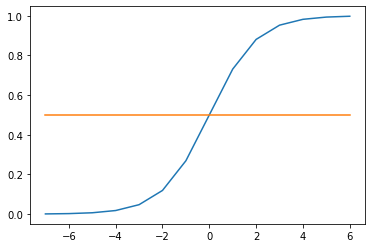

In [84]:
x = [i for i in range(-7,7)]

plt.plot(x,[sigmoid(i) for i in x])
plt.plot(x,[0.5 for i in x])

print("sigmoid with input  0: ", sigmoid(0))
print("sigmoid with input -1: ", sigmoid(-1))
print("sigmoid with input  1: ", sigmoid(1))

#### Step 2 of Building NN: Initialization the Parameters of the model
$$z^{(i)} = w^T x^{(i)} + b $$


In [77]:
def param_initilization(dim):
    w = np.zeros((dim,1))
    b = 0.0
    
    return w,b

print(param_initilization(2))

(array([[0.],
       [0.]]), 0.0)


#### Step 3 of Building NN: Forward and Backward Propagation

**Forward Propagation: Calculate activation and cost**
Forward Propagation:
- You get X
- You compute $A = \sigma(w^T X + b) = (a^{(1)}, a^{(2)}, ..., a^{(m-1)}, a^{(m)})$
- You calculate the cost function: $J = -\frac{1}{m}\sum_{i=1}^{m}(y^{(i)}\log(a^{(i)})+(1-y^{(i)})\log(1-a^{(i)}))$

**Backward Propagtion: Calculate the Gradients**


$$ \frac{\partial J}{\partial w} = \frac{1}{m}X(A-Y)^T$$
$$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (a^{(i)}-y^{(i)})$$

In [109]:
def propagation(w,b,X,Y):
    
    m = X.shape[1]
    #Forward Propagation
    Activation = sigmoid(np.dot(w.T,X) + b)
    Cost =- 1/m * (np.dot(Y,np.log(Activation).T) + np.dot((1-Y), np.log(1-Activation).T))
    
    #Backward Propagtion: Gradients respect to w and b
    dw =1/m * np.dot(X, (Activation - Y).T)
    db = 1/m * np.sum(Activation - Y)
    Cost = np.squeeze(np.array(Cost))
    grads = {
            'dw' : dw,
            'db' : db
    }
    return Cost, grads

In [121]:
w =  np.array([[1.], [2.]])
b = 2.
X =np.array([[1., 2., -1.], [3., 4., -3.2]])
Y = np.array([[1, 0, 1]])
cost, grads = propagation(w, b, X, Y)

print("Cost calculated: ",cost.item())
print("Gradient respect to w: \n", grads['dw'])
print("Gradient respect to b: \n", grads['db'])

Cost calculated:  5.801545319394553
Gradient respect to w: 
 [[0.99845601]
 [2.39507239]]
Gradient respect to b: 
 0.001455578136784208


##### Step 4 of Building NN: Optimization
**Update the parameters w and b by using Gradient Descent**

$ \theta = \theta - \alpha \text{ } d\theta$

In [122]:
import copy
def Optimization(w,b,X,Y,num_iters = 100, alpha = 0.009, print_cost = False):
    
    w = copy.deepcopy(w)
    b = copy.deepcopy(b)
    # A deep copy constructs a new compound object and then, recursively,
    # inserts copies into it of the objects found in the original.
    
    costs = []
    
    for i in range(num_iters):
        #Cost and Gradient
        cost,grads = propagation(w,b,X,Y)
        
        #update parameters w and b using  partial derivatives
        dw = grads['dw']
        db =  grads['db']
        w = w - alpha * dw
        b = b - alpha * db        
        
        if i % 100 == 0:
            costs.append(cost)
            
            if print_cost :
                print("Cost after iteration %i: %d" %(i,cost))
    params = {"w": w,"b":b}
    grads  = {"dw": dw,"db":db}
    
    return params, grads, costs

In [129]:
params, grads, costs = Optimization(w, b, X, Y, num_iters=100, alpha=0.009, print_cost=False)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print("Costs = " + str(costs))

print("which are same to the expected values")

w = [[0.19033591]
 [0.12259159]]
b = 1.9253598300845747
dw = [[0.67752042]
 [1.41625495]]
db = 0.21919450454067652
Costs = [array(5.80154532)]
which are same to the expected values


### Prediction using learned parameters w and b

$\hat{Y} = A = \sigma(w^T X + b)$
with $\hat{Y}$ converts to 0 or 1

In [132]:
def predict(w,b,X):
    m = X.shape[1]
    Y_hat = np.zeros((1,m))
    w = w.reshape(X.shape[0],1)
    
    Activation = sigmoid(np.dot(w.T, X)+ b)
 
    #Convert activation values to only 0 or 1 by threshold 0.5
    Y_hat = np.where(Activation>0.5,1,0)
    
    return Y_hat

In [134]:
w = np.array([[0.1124579], [0.23106775]])
b = -0.3
X = np.array([[1., -1.1, -3.2],[1.2, 2., 0.1]])
print ("predictions = " + str(predict(w, b, X)))

print("Calculated values equals to expected values")

predictions = [[1 1 0]]
Calculated values equals to expected values


### Packing into a Model

In [139]:
def model(X_train,Y_train,X_test,Y_test, num_iters = 2000, alpha = 0.5, print_cost = False):
    
    # Initialize the parameters w, b by the dimensions of Training set
    w, b = param_initilization(X_train.shape[0])
    
    #Optimize the parameters by using Gradient Descent
    params,grads,costs = Optimization(w,b,X_train,Y_train,num_iters=num_iters, alpha=alpha,print_cost=False)
    w = params['w']
    b = params['b']    
    
    # Predictions of both train and test sets
    Y_hat_test = predict(w,b,X_test)
    Y_hat_train = predict(w,b,X_train)
    
    #Errors
    if print_cost:
        print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_hat_train - Y_train)) * 100))
        print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_hat_test - Y_test)) * 100))


    d = {"costs": costs,
         "Y_prediction_test": Y_hat_test, 
         "Y_prediction_train" : Y_hat_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : alpha,
         "num_iterations": num_iters}
    
    return d

In [140]:
logistic_regression_model = model(train_set_x, y_train_orig, test_set_x, y_test_orig, num_iters=2000, alpha=0.005, print_cost=True)

train accuracy: 99.04306220095694 %
test accuracy: 70.0 %


Text(0.5, 1.0, 'Learning rate =0.005')

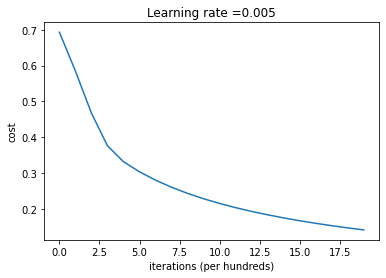

In [143]:
costs = logistic_regression_model['costs']
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(logistic_regression_model["learning_rate"]))

## Analysis

**Learning Rate Alpha is critical in the learning process, analysis different alpha to the costs**

Training a model with learning rate: 0.01

-------------------------------------------------------

Training a model with learning rate: 0.001

-------------------------------------------------------

Training a model with learning rate: 0.0001

-------------------------------------------------------



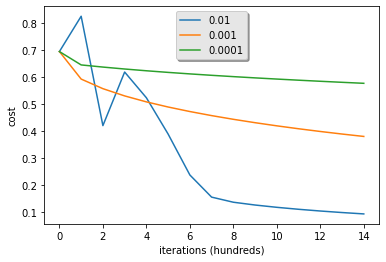

In [146]:
learning_rates = [0.01, 0.001, 0.0001]
models = {}

for lr in learning_rates:
    print ("Training a model with learning rate: " + str(lr))
    models[str(lr)] = model(train_set_x, y_train_orig, test_set_x, y_test_orig, num_iters=1500, alpha=lr, print_cost=False)
    print ('\n' + "-------------------------------------------------------" + '\n')

for lr in learning_rates:
    plt.plot(np.squeeze(models[str(lr)]["costs"]), label=str(models[str(lr)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations (hundreds)')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()